>**Developer:** Mukesh Kumar

>**Email:** coldperformer@gmail.com

>**LinkedIn:** https://www.linkedin.com/in/mk09/

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---



- Big Mart Retail is a grocery supermarket brand, and it is widely known for its home delivery services of food and grocery. 

- It enables the customer to shop in a relaxed way of browsing from their home or office. 

<center><img src="https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/Images/01-Big-Mart-Intro.jpg"></center>

- It avoids getting stuck in traffic jams, standing in long queues, paying for parking, and carrying heavy bags and the customer can get everything they want, right at their doorstep.

---
<a name = Section2></a>
# **2. Problem Statement**
---



- Bigmart is a big supermarket chain, with stores all around the country. 

- The management of the shop had set out a challenge to all Data Scientist to help them create a model that can predict the sales per product for each store.

- The shop has collected sales data of products across 10 stores in different cities over a given period of time.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

- **After installing & upgrading** the libraries, you need to **restart the runtime** to sync the libraries. 

- Make sure not to execute the following cell again after restarting the runtime.

In [ ]:
!pip install -q --upgrade datascience                               # A package that is required by pandas-profiling library
!pip install -q --upgrade pandas-profiling                          # A library to generate basic statistics about data
!pip install -q --upgrade category_encoders                         # A package with variety of encoding techniques

<a name = Section32></a>
### **3.2 Importing Libraries**

In [163]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from category_encoders.hashing import HashingEncoder                # Hashing encoder for highly cardinal features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the items sold per item and the sales developed from 1985 - 2010.

|Type| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
|Train| 8523 | 12 | 849 KB | 
|Test| 5681 | 11 | 515 KB |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|01|Item_Identifier|A unique identifier for each item.|
|02|Item_Weight|Weight of the item.|
|03|Item_Fat_Content|The type of fat content in the item. Contains: [Low, Regular]|
|04|Item_Visibility|The visibility of item in the store.|
|05|Item_Type|Type of the item.|
|06|Item_MRP|The monetary value of the item.|
|07|Outlet_Identifier|A unique identifier of item outlet.|
|08|Outlet_Establishment_Year|The establishment year of the outlet.|
|09|Outlet_Size|Size of the outlet. Contains: [Small, Medium, High]|
|10|Outlet_Location_Type|The type of the outlet location. Contains: [Tier 1, Tier 2, Tier 3]|
|11|Outlet_Type|The type of the outlet.|
|12|Item_Outlet_Sales|Sales value of outlet from where item bought.|

In [315]:
train_data = pd.read_csv('https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/data/01-Big-Mart-Sales-Train.csv')
print('Shape of the dataset:', train_data.shape)
train_data.head()

Shape of the dataset: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.01605,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800
1,DRC01,5.92000,Regular,0.01928,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280
2,FDN15,17.50000,Low Fat,0.01676,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


In [316]:
test_data = pd.read_csv('https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/data/02-Big-Mart-Sales-Test.csv')
print('Shape of the dataset:', test_data.shape)
test_data.head()

Shape of the dataset: (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.00756,Snack Foods,107.86220,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,reg,0.03843,Dairy,87.31980,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.09957,Others,241.75380,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.01539,Snack Foods,155.03400,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.11860,Dairy,234.23000,OUT027,1985,Medium,Tier 3,Supermarket Type3


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [260]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00000,8523.00000,8523.00000,8523.00000,8523.00000
mean,12.85765,0.06613,140.99278,1997.83187,2181.28891
std,4.64346,0.05160,62.27507,8.37176,1706.49962
min,4.55500,0.00000,31.29000,1985.00000,33.29000
25%,8.77375,0.02699,93.82650,1987.00000,834.24740
50%,12.60000,0.05393,143.01280,1999.00000,1794.33100
75%,16.85000,0.09459,185.64370,2004.00000,3101.29640
max,21.35000,0.32839,266.88840,2009.00000,13086.96480


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [261]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [262]:
# profile = ProfileReport(df=train_data)
# profile.to_file(output_file='Pre Profiling Report.html')

**Observations:**

- The report shows that there are in total 12 features out of which 7 are categorical and 5 are numerical.

- There exists in total 3873 (3.8%) missing cells in the dataset.
    - Item_Weight (1463 cells missing) &rarr; Replace missing data with median

    - Outlet_Size (2410 cells missing) &rarr; Replace missing data with mode

- Feature Item_Fat_Content contains non-standardized data values.
    - Replace LF and low fat with Low Fat, and reg with Regular labels.

<a name = Section52></a>
### **5.2 Data Cleaning**

In [307]:
# Handling missing data over train set and test set
train_data['Item_Weight'] = train_data['Item_Weight'].replace(np.nan, train_data['Item_Weight'].median())
test_data['Item_Weight'] = test_data['Item_Weight'].replace(np.nan, train_data['Item_Weight'].median())
train_data['Outlet_Size'] = train_data['Outlet_Size'].replace(np.nan, train_data['Outlet_Size'].mode()[0])
test_data['Outlet_Size'] = test_data['Outlet_Size'].replace(np.nan, train_data['Outlet_Size'].mode()[0])

# Data standardization over train set and test set
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')

<a name = Section53></a>
### **5.3 Post Profiling Report**

In [264]:
# profile = ProfileReport(df=train_data)
# profile.to_file(output_file='Post Profiling Report.html')

- Data Cleaning Success!

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question:** What is the item visibility per item type in the dataset?</h4>

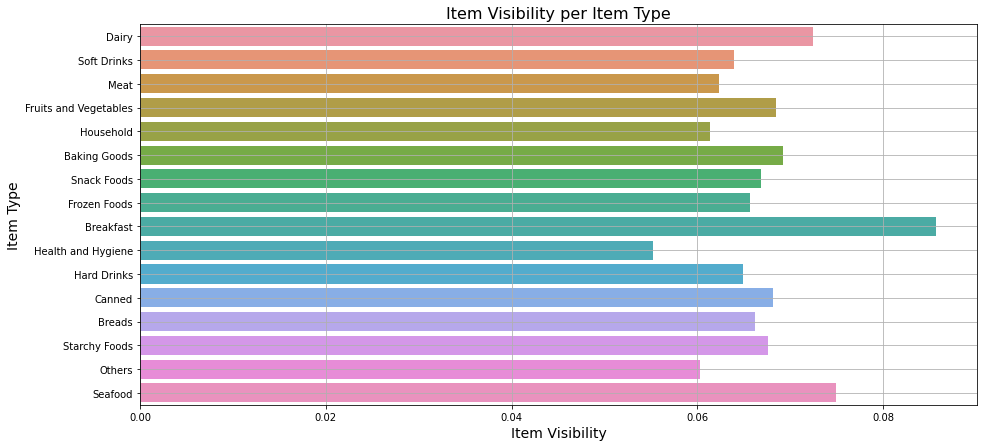

In [311]:
figure = plt.figure(figsize=[15, 7])
sns.barplot(y='Item_Type', x='Item_Visibility', data=train_data, ci=False)
plt.xlabel(xlabel='Item Visibility', size=14)
plt.ylabel(ylabel='Item Type', size=14)
plt.title(label='Item Visibility per Item Type', size=16)
plt.grid(b=True)
plt.show()

**<h4>Question:** What is the item weight per item type in the dataset?</h4>

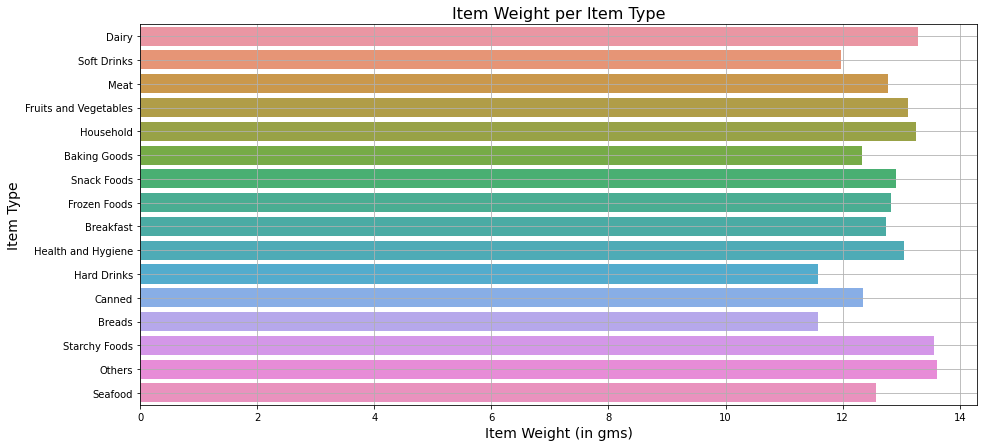

In [313]:
figure = plt.figure(figsize=[15, 7])
sns.barplot(y='Item_Type', x='Item_Weight', data=train_data, ci=False)
plt.xlabel(xlabel='Item Weight (in gms)', size=14)
plt.ylabel(ylabel='Item Type', size=14)
plt.title(label='Item Weight per Item Type', size=16)
plt.grid(b=True)
plt.show()

**<h4>Question:** What is the item outlet sales per outlet type in the dataset?</h4>

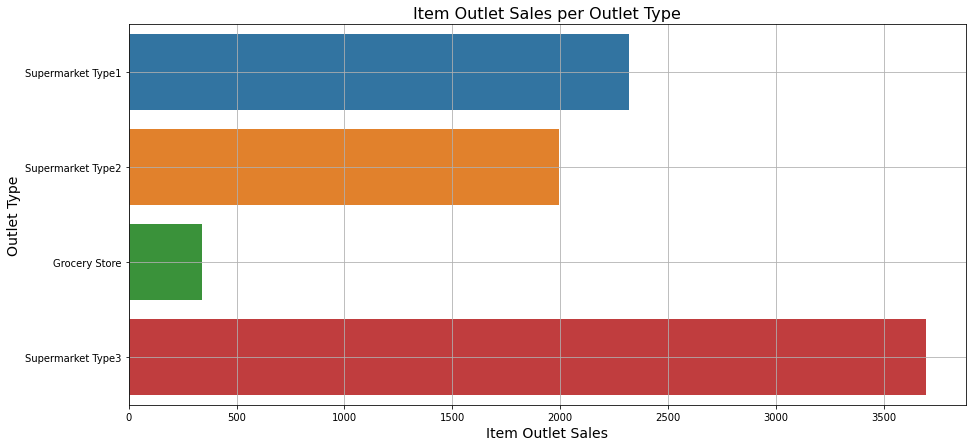

In [314]:
figure = plt.figure(figsize=[15, 7])
sns.barplot(y='Outlet_Type', x='Item_Outlet_Sales', data=train_data, ci=False)
plt.xlabel(xlabel='Item Outlet Sales', size=14)
plt.ylabel(ylabel='Outlet Type', size=14)
plt.title(label='Item Outlet Sales per Outlet Type', size=16)
plt.grid(b=True)
plt.show()

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Encoding**

In [265]:
cat_features = list()
label_len = list()
cat_values = list()

# Get categorical features
for feature in train_data.columns:
    if train_data[feature].dtype == object:
        cat_features.append(feature)

# Identify labels and length per feature
for i in cat_features:
  label_len.append(len(train_data[i].unique()))
  cat_values.append(train_data[i].unique())

# Create and show categorical feature frame
cat_frame = pd.DataFrame(data={'Length': label_len, 'Values': cat_values}, index=cat_features)
cat_frame.transpose()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Length,1559,2,16,10,3,3,4
Values,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO10, FDP10, FDH17, FDU28, FDY07, FDA03, FDX32, FDS46, FDF32, FDP49, NCB42, DRI11, FDU02, FDN22, FDW12, NCB30, FDC37, FDR28, NCD06, FDV10, DRJ59, FDE51, FDC14, FDV38, NCS17, FDP33, FDO23, DRH01, NCX29, FDV20, DRZ11, FDX10, FDB34, FDK43, FDA46, FDC02, FDL50, FDM39, NCP05, FDV49, FDL12, FDS02, NCL17, FDM40, FDR13, FDA43, NCP18, FDK21, NCX54, DRK35, FDY21, FDI26, FDM20, FDV27, FDF09, FDY40, FDY45, FDC46, FDH19, FDZ03, DRH37, NCI17, FDJ58, FDH35, FDG02, NCZ18, FDC29, FDQ10, FDN48, FDL04, FDV25, FDD58, FDN04, FDV45, NCL18, FDR12, FDG20, FDZ55, FDQ49, FDN33, FDN27, FDW20, DRG27, DRI25, FDA44, NCR17, FDU04, FDF41, FDB56, FDT28, FDD10, FDW57, DRB48, FDP09, ...]","[Low Fat, Regular]","[Dairy, Soft Drinks, Meat, Fruits and Vegetables, Household, Baking Goods, Snack Foods, Frozen Foods, Breakfast, Health and Hygiene, Hard Drinks, Canned, Breads, Starchy Foods, Others, Seafood]","[OUT049, OUT018, OUT010, OUT013, OUT027, OUT045, OUT017, OUT046, OUT035, OUT019]","[Medium, High, Small]","[Tier 1, Tier 3, Tier 2]","[Supermarket Type1, Supermarket Type2, Grocery Store, Supermarket Type3]"


**Observations:**

- Item_Identifier &rarr; Too many unique values, drop feature
- Item_Fat_Content &rarr; One hot encoding
- Item_Type &rarr; Hashing
- Outlet_Identifier &rarr; Hashing
- Outlet_Size &rarr; Label Encoding
- Outlet_Location_Type &rarr; Label Encoding
- Outlet_Type &rarr; One hot encoding

In [266]:
# Seperating out Item_Outlet_Sales from train set
# Hashing requires same dimensions for train set and test set
temp_var = train_data['Item_Outlet_Sales']
train_data = train_data.drop(labels=['Item_Outlet_Sales'], axis=1)

In [267]:
# Dropping Item_Identifier from train and test set
train_data = train_data.drop(labels=['Item_Identifier'], axis=1)
test_data = test_data.drop(labels=['Item_Identifier'], axis=1)

# One hot encoding on train and test set
train_data = pd.get_dummies(data=train_data, columns=['Item_Fat_Content', 'Outlet_Type'])
test_data = pd.get_dummies(data=test_data, columns=['Item_Fat_Content', 'Outlet_Type'])

# Label encoding on train and test set
labeler1 = LabelEncoder()
labeler2 = LabelEncoder()
labeler3 = LabelEncoder()

train_data['Outlet_Size'] = labeler1.fit_transform(train_data['Outlet_Size'])
test_data['Outlet_Size'] = labeler1.transform(test_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = labeler2.fit_transform(train_data['Outlet_Location_Type'])
test_data['Outlet_Location_Type'] = labeler2.transform(test_data['Outlet_Location_Type'])
train_data['Outlet_Establishment_Year'] = labeler3.fit_transform(train_data['Outlet_Establishment_Year'])
test_data['Outlet_Establishment_Year'] = labeler3.transform(test_data['Outlet_Establishment_Year'])

# Hash encoding on train and test set for Item_Type and Outlet_Identifier
hasher = HashingEncoder(cols=['Item_Type', 'Outlet_Identifier'], n_components=5, max_process=1)
encoded_train_data = hasher.fit_transform(train_data)
encoded_test_data = hasher.transform(test_data)

# Adding Item_Outlet_Sales back to train set
encoded_train_data['Item_Outlet_Sales'] = temp_var

# Display the dimensions of train and test, and view top 5 entries
print('Train Data Shape:', encoded_train_data.shape)
print('Test Data Shape:', encoded_test_data.shape)
encoded_train_data.head()

Train Data Shape: (8523, 18)
Test Data Shape: (5681, 17)


,col_0,col_1,col_2,col_3,col_4,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,0,1,0,1,0,9.30000,0.01605,249.80920,4,1,0,1,0,0,1,0,0,3735.13800
1,0,0,1,1,0,5.92000,0.01928,48.26920,8,1,2,0,1,0,0,1,0,443.42280
2,0,0,0,1,1,17.50000,0.01676,141.61800,4,1,0,1,0,0,1,0,0,2097.27000
3,0,0,0,2,0,19.20000,0.00000,182.09500,3,1,2,0,1,1,0,0,0,732.38000
4,1,1,0,0,0,8.93000,0.00000,53.86140,1,0,2,1,0,0,1,0,0,994.70520


<a name = Section72></a>
### **7.2 Feature Scaling**

- Features such as Item_Weight, Item_Fat_Content, Item_MRP, Item_Outlet_Sales are not scaled at same range.

- To scale them, we will use Min-max scaler on train set and test set.

In [268]:
scaler = MinMaxScaler()
encoded_train_data['Item_Weight'] = scaler.fit_transform(encoded_train_data[['Item_Weight']])
encoded_test_data['Item_Weight'] = scaler.transform(encoded_test_data[['Item_Weight']])
encoded_train_data['Item_MRP'] = scaler.fit_transform(encoded_train_data[['Item_MRP']])
encoded_test_data['Item_MRP'] = scaler.transform(encoded_test_data[['Item_MRP']])
encoded_train_data['Item_Outlet_Sales'] = scaler.fit_transform(encoded_train_data[['Item_Outlet_Sales']])
encoded_train_data[['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']].describe()

,Item_Weight,Item_MRP,Item_Outlet_Sales
count,8523.00000,8523.00000,8523.00000
mean,0.49172,0.46563,0.16455
std,0.25170,0.26433,0.13073
min,0.00000,0.00000,0.00000
25%,0.28312,0.26544,0.06136
50%,0.47901,0.47421,0.13491
75%,0.68145,0.65516,0.23503
max,1.00000,1.00000,1.00000


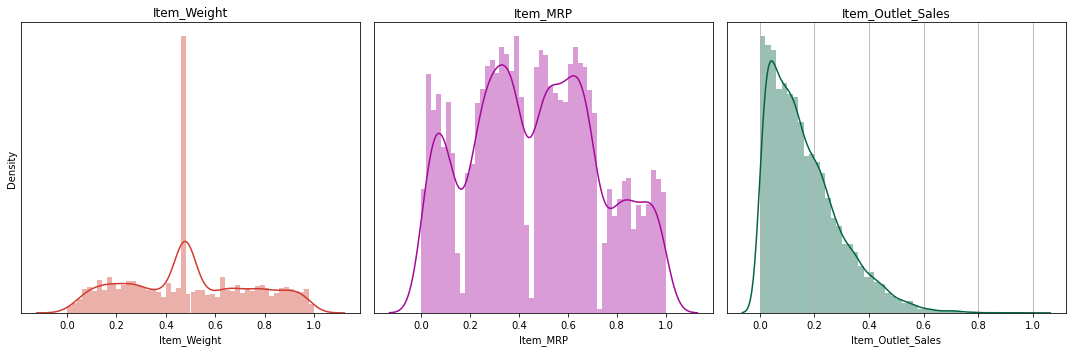

In [269]:
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(15, 5))

# Generating random colors based on number of columns
colors = []

for i in range(3):
  colors.append('#%06X' % np.random.randint(0, 0xFFFFFF))

# Choosing numerical columns
columns = ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']      
                
for ax, col, color in zip(axes.flat, columns, colors):
    sns.distplot(a=encoded_train_data[col], bins=50, ax=ax, color=color)
    ax.set_title(col)
    plt.setp(axes, yticks=[])
    ax.grid(False)
plt.tight_layout()
plt.grid(b=True)
plt.show()

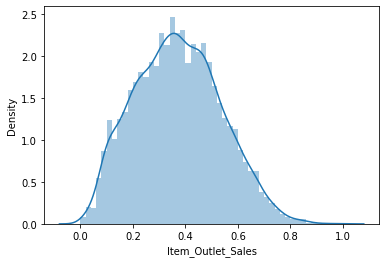

In [270]:
# Applying square root transformation
encoded_train_data['Item_Outlet_Sales'] = np.sqrt(encoded_train_data['Item_Outlet_Sales'])
sns.distplot(a=encoded_train_data['Item_Outlet_Sales'], bins=50)
plt.show()

<a name = Section73></a>
### **7.3 Feature Binning**

- To add control over model learning, we need to ensure that the data splitting happens in stratified fashion.

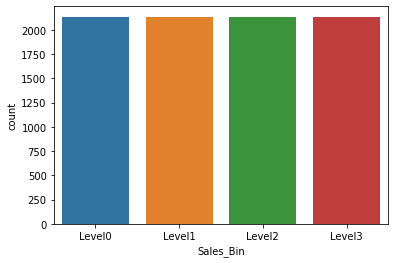

In [271]:
bins = [encoded_train_data['Item_Outlet_Sales'].quantile(0), 
        encoded_train_data['Item_Outlet_Sales'].quantile(0.25), 
        encoded_train_data['Item_Outlet_Sales'].quantile(0.5), 
        encoded_train_data['Item_Outlet_Sales'].quantile(0.75), 
        encoded_train_data['Item_Outlet_Sales'].quantile(1)]
names = ['Level0', 'Level1', 'Level2', 'Level3']

encoded_train_data['Sales_Bin'] = pd.cut(x=encoded_train_data['Item_Outlet_Sales'], 
                                         bins=bins, 
                                         labels=names, 
                                         include_lowest=True)

sns.countplot(x='Sales_Bin', data=encoded_train_data)
plt.show()

<a name = Section73></a>
### **7.3 Data Preparation**

- Let's split our data into train set and validation set.

In [272]:
X = encoded_train_data.drop(labels=['Item_Outlet_Sales'], axis=1)
y = encoded_train_data['Item_Outlet_Sales']

In [273]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Sales_Bin'])

print('Train Dat Shape:', X_train.shape, y_train.shape)
print('Validation Data Shape:', X_val.shape, y_val.shape)

Train Dat Shape: (6818, 18) (6818,)
Validation Data Shape: (1705, 18) (1705,)


In [276]:
X_train.drop(labels=['Sales_Bin'], axis=1, inplace=True)
X_val.drop(labels=['Sales_Bin'], axis=1, inplace=True)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [282]:
%%time

models = [LinearRegression(), 
          SVR(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          BaggingRegressor(), 
          AdaBoostRegressor(),
          GradientBoostingRegressor()]

r_squared_train = list()
r_squared_val = list()
mse_train = list()
mse_val = list()
model_names = list()

for model in models:
    model.fit(X_train, y_train)
    model_names.append(model.__class__.__name__)

    train_predictions = model.predict(X_train)
    validation_predictions = model.predict(X_val)

    r_squared_train.append(model.score(X_train, y_train))
    r_squared_val.append(model.score(X_val, y_val))

    mse_train.append(mean_squared_error(y_train, train_predictions))
    mse_val.append(mean_squared_error(y_val, validation_predictions))

CPU times: user 8.34 s, sys: 158 ms, total: 8.5 s
Wall time: 8.36 s


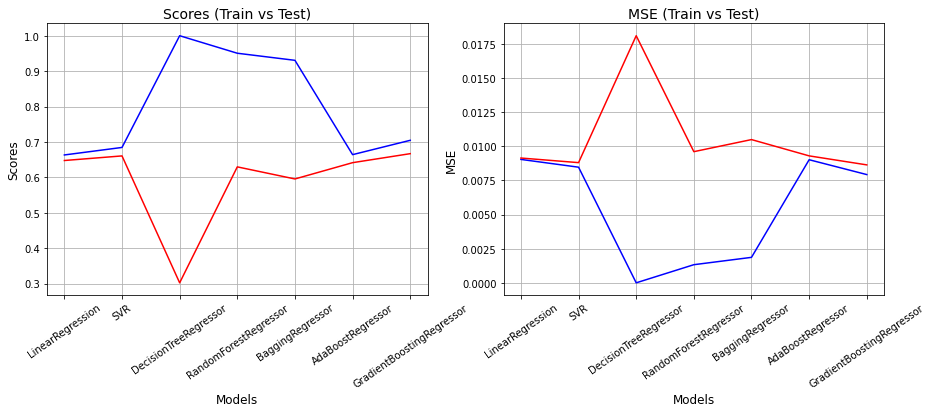

In [294]:
x_range_values = [i for i in range(len(models))]

figure = plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
sns.lineplot(x=x_range_values, y=r_squared_train, color='blue')
sns.lineplot(x=x_range_values, y=r_squared_val, color='red')
plt.xticks(ticks=x_range_values, labels=model_names, rotation=35)
plt.xlabel(xlabel='Models', size=12)
plt.ylabel(ylabel='Scores', size=12)
plt.title(label='Scores (Train vs Validation)', size=14)
plt.grid(b=True)

plt.subplot(1, 2, 2)
sns.lineplot(x=x_range_values, y=mse_train, color='blue')
sns.lineplot(x=x_range_values, y=mse_val, color='red')
plt.xticks(ticks=x_range_values, labels=model_names, rotation=35)
plt.xlabel(xlabel='Models', size=12)
plt.ylabel(ylabel='MSE', size=12)
plt.title(label='MSE (Train vs Validation)', size=14)
plt.grid(b=True)
plt.show()

In [295]:
%%time

models = [RandomForestRegressor(n_estimators=1000, random_state=42), 
          GradientBoostingRegressor(n_estimators=1000, random_state=42)]

r_squared_train = list()
r_squared_val = list()
mse_train = list()
mse_val = list()
model_names = list()

for model in models:
    model.fit(X_train, y_train)
    model_names.append(model.__class__.__name__)

    train_predictions = model.predict(X_train)
    validation_predictions = model.predict(X_val)

    r_squared_train.append(model.score(X_train, y_train))
    r_squared_val.append(model.score(X_val, y_val))

    mse_train.append(mean_squared_error(y_train, train_predictions))
    mse_val.append(mean_squared_error(y_val, validation_predictions))

CPU times: user 49.4 s, sys: 445 ms, total: 49.8 s
Wall time: 49.6 s


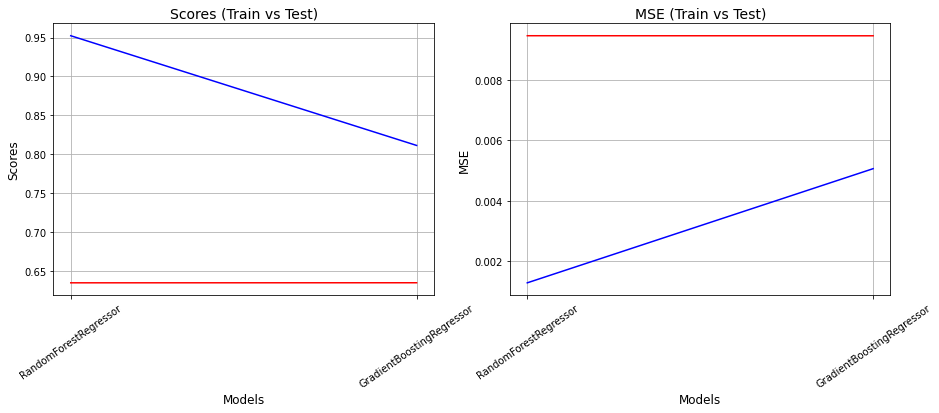

In [296]:
x_range_values = [i for i in range(len(models))]

figure = plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
sns.lineplot(x=x_range_values, y=r_squared_train, color='blue')
sns.lineplot(x=x_range_values, y=r_squared_val, color='red')
plt.xticks(ticks=x_range_values, labels=model_names, rotation=35)
plt.xlabel(xlabel='Models', size=12)
plt.ylabel(ylabel='Scores', size=12)
plt.title(label='Scores (Train vs Test)', size=14)
plt.grid(b=True)

plt.subplot(1, 2, 2)
sns.lineplot(x=x_range_values, y=mse_train, color='blue')
sns.lineplot(x=x_range_values, y=mse_val, color='red')
plt.xticks(ticks=x_range_values, labels=model_names, rotation=35)
plt.xlabel(xlabel='Models', size=12)
plt.ylabel(ylabel='MSE', size=12)
plt.title(label='MSE (Train vs Test)', size=14)
plt.grid(b=True)
plt.show()

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**


- We analyzed and understood the behavior of the data and performed manipulations accordingly.

- We didn't go through the data analysis in-depth as the use case was associated with identifying the best model for future data.

- We performed various transformations over the features as per the requirement and tried out several machine models.

- It turns out that the models are not working as per expectations and the max accuracy achieved by them is around 60%.


<a name = Section92></a>
### **9.2 Actionable Insights**

- The company should focus on existing customers more that the new customers.

- The company should analyze what the competitors offer and learn new techniques, thinking of ways to outdo them.

-  The promotions and marketing can give the customers a great deal of existence of the products or services in the market.

- Credibility is the one of the key factors that makes the customers trust and feel comfortable with your products and services.